In [1]:
import pandas as pd


In [2]:
#Load my dataset
df = pd.read_csv('Loan_approval_data_2025.csv')

In [3]:
#check to see if data is loaded correctly
df.head(3)

,customer_id,age,occupation_status,years_employed,annual_income,credit_score,credit_history_years,savings_assets,current_debt,defaults_on_file,delinquencies_last_2yrs,derogatory_marks,product_type,loan_intent,loan_amount,interest_rate,debt_to_income_ratio,loan_to_income_ratio,payment_to_income_ratio,loan_status
0,CUST100000,40,Employed,17.2,25579,692,5.3,895,10820,0,0,0,Credit Card,Business,600,17.02,0.423,0.023,0.008,1
1,CUST100001,33,Employed,7.3,43087,627,3.5,169,16550,0,1,0,Personal Loan,Home Improvement,53300,14.10,0.384,1.237,0.412,0
2,CUST100002,42,Student,1.1,20840,689,8.4,17,7852,0,0,0,Credit Card,Debt Consolidation,2100,18.33,0.377,0.101,0.034,1


In [4]:
print(df.info()) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   customer_id              50000 non-null  object 
 1   age                      50000 non-null  int64  
 2   occupation_status        50000 non-null  object 
 3   years_employed           50000 non-null  float64
 4   annual_income            50000 non-null  int64  
 5   credit_score             50000 non-null  int64  
 6   credit_history_years     50000 non-null  float64
 7   savings_assets           50000 non-null  int64  
 8   current_debt             50000 non-null  int64  
 9   defaults_on_file         50000 non-null  int64  
 10  delinquencies_last_2yrs  50000 non-null  int64  
 11  derogatory_marks         50000 non-null  int64  
 12  product_type             50000 non-null  object 
 13  loan_intent              50000 non-null  object 
 14  loan_amount           

In [5]:
print(df.describe())

                age  years_employed  annual_income  credit_score  \
count  50000.000000    50000.000000   50000.000000  50000.000000   
mean      34.957060        7.454868   50062.892040    643.614820   
std       11.118603        7.612097   32630.501014     64.731518   
min       18.000000        0.000000   15000.000000    348.000000   
25%       26.000000        1.300000   27280.500000    600.000000   
50%       35.000000        4.900000   41607.500000    643.000000   
75%       43.000000       11.400000   62723.250000    687.000000   
max       70.000000       39.900000  250000.000000    850.000000   

       credit_history_years  savings_assets   current_debt  defaults_on_file  \
count          50000.000000    50000.000000   50000.000000      50000.000000   
mean               8.168274     3595.619400   14290.442220          0.053480   
std                7.207552    13232.399398   13243.757493          0.224991   
min                0.000000        0.000000      60.000000         

In [6]:
print(df.isnull().sum())

customer_id                0
age                        0
occupation_status          0
years_employed             0
annual_income              0
credit_score               0
credit_history_years       0
savings_assets             0
current_debt               0
defaults_on_file           0
delinquencies_last_2yrs    0
derogatory_marks           0
product_type               0
loan_intent                0
loan_amount                0
interest_rate              0
debt_to_income_ratio       0
loan_to_income_ratio       0
payment_to_income_ratio    0
loan_status                0
dtype: int64


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

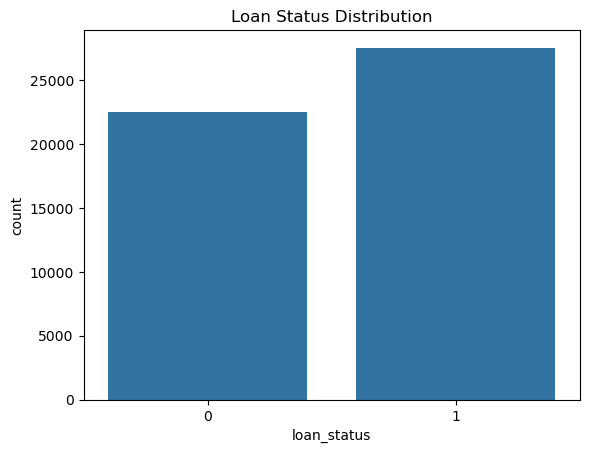

In [8]:
#checking to see Loan default distribution
sns.countplot(x='loan_status', data=df)
plt.title('Loan Status Distribution')
plt.show()


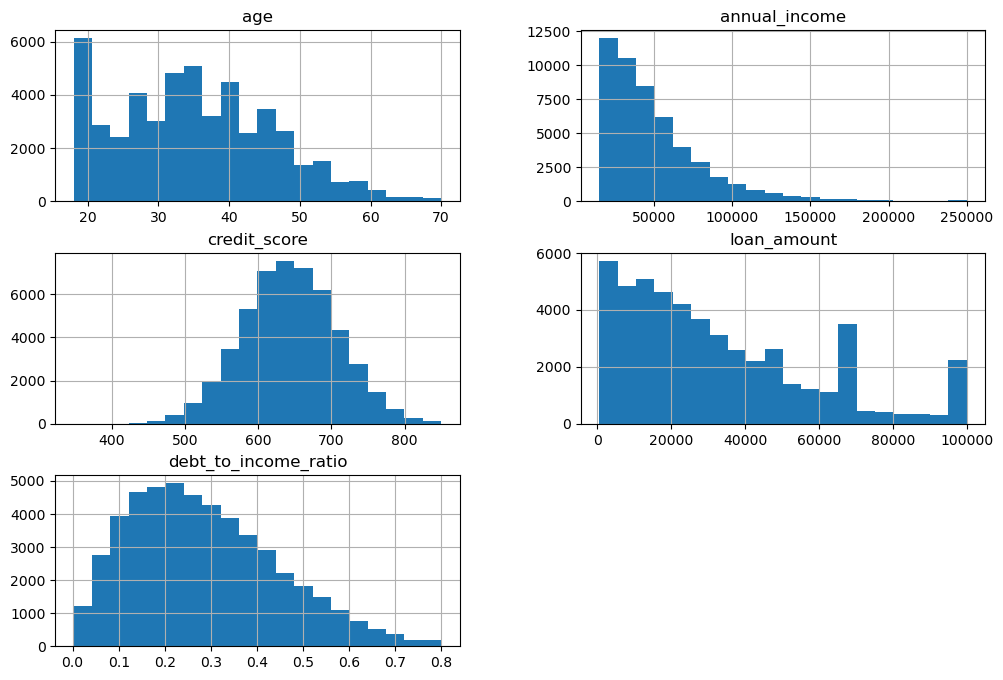

In [9]:
numeric_cols = ['age', 'annual_income', 'credit_score', 'loan_amount', 'debt_to_income_ratio']

df[numeric_cols].hist(figsize=(12,8), bins=20)
plt.show()


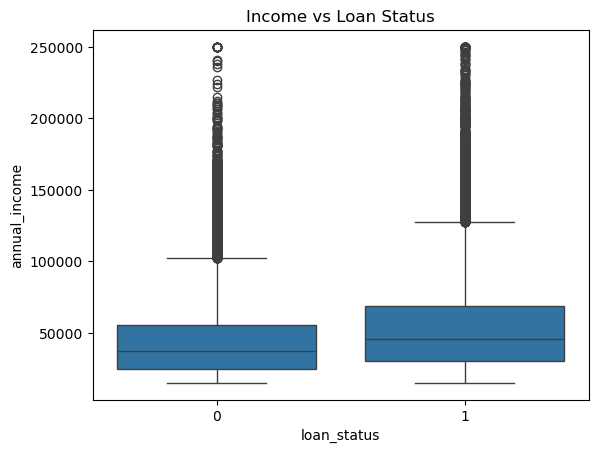

In [10]:
sns.boxplot(x='loan_status', y='annual_income', data=df)
plt.title('Income vs Loan Status')
plt.show()


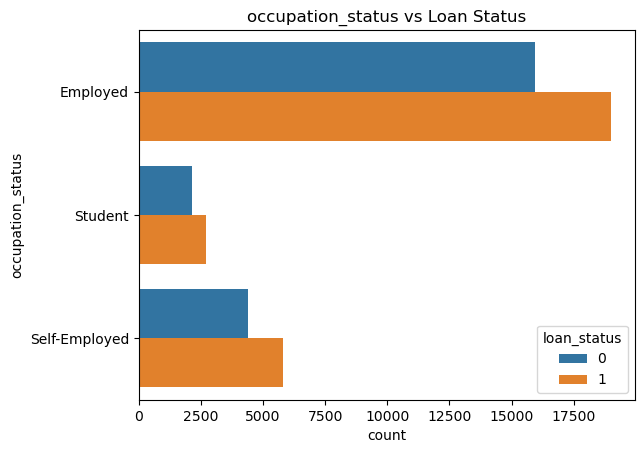

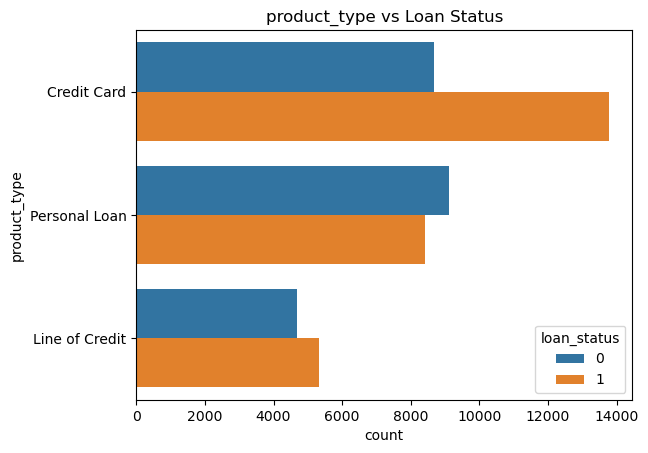

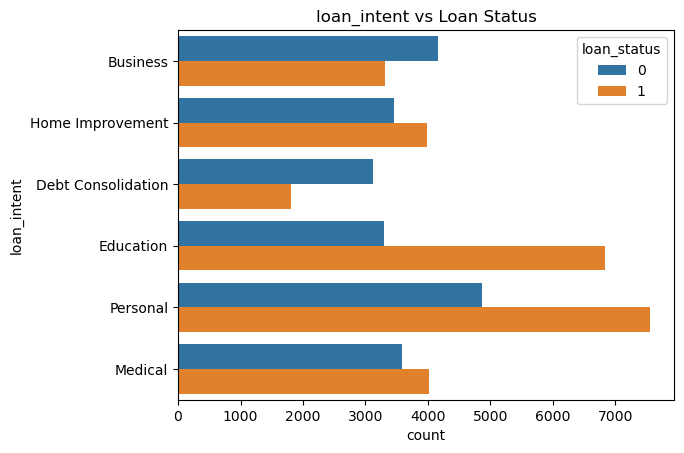

In [11]:
categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

for col in categorical_cols:
    sns.countplot(y=col, hue='loan_status', data=df)
    plt.title(f'{col} vs Loan Status')
    plt.show()


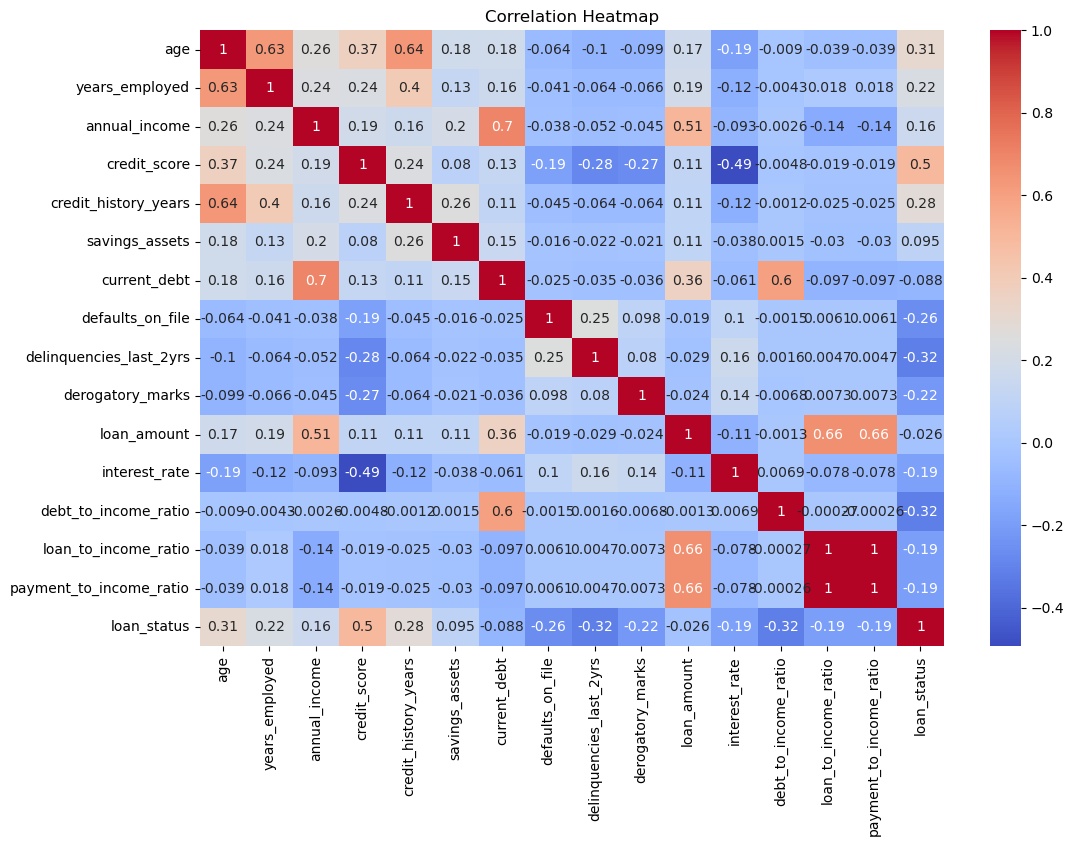

In [12]:
#Correlation analysis
plt.figure(figsize=(12,8))
numeric_df = df.select_dtypes(include='number')
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

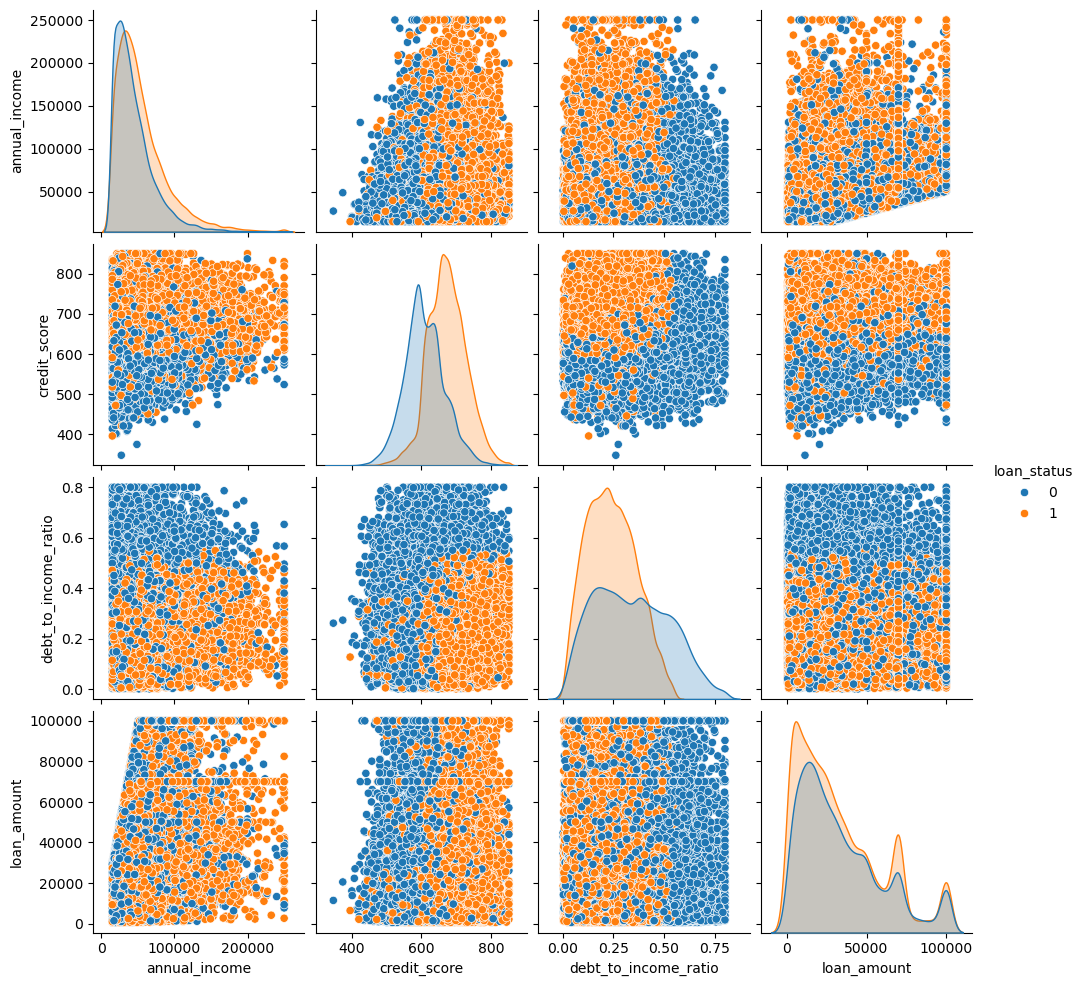

In [13]:
sns.pairplot(df, vars=['annual_income', 'credit_score', 'debt_to_income_ratio', 'loan_amount'], hue='loan_status')
plt.show()


In [14]:
#Feature Engineering
df['loan_to_income_ratio'] = df['loan_amount'] / df['annual_income']
df['payment_to_income_ratio'] = (df['loan_amount'] * df['interest_rate']/100) / df['annual_income']


In [15]:
from sklearn.preprocessing import OneHotEncoder

categorical_cols = ['occupation_status', 'product_type', 'loan_intent']

encoder = OneHotEncoder(sparse_output=False, drop='first')

encoded_data = encoder.fit_transform(df[categorical_cols])

encoded_cols = encoder.get_feature_names_out(categorical_cols)

encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols)


In [16]:
df_numeric = df.drop(columns=categorical_cols + ['customer_id'])

df_final = pd.concat([df_numeric, encoded_df], axis=1)

X = df_final.drop('loan_status', axis=1)  # features

y = df_final['loan_status']               # target

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    
    X, y, test_size=0.2, random_state=42
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(40000, 24) (10000, 24) (40000,) (10000,)


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report , f1_score, roc_auc_score

In [18]:
lg = LogisticRegression(
    max_iter=2000,      
    random_state=42,
    class_weight='balanced',
    C=0.5,      
    solver='liblinear' 
)
lg.fit(X_train, y_train)
preds = lg.predict(X_test)
pred_probs = lg.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, pred_probs))



Accuracy: 0.8498
F1 Score: 0.8618469462840324
ROC-AUC: 0.9309081305205612


In [19]:
rfc = RandomForestClassifier(
    n_estimators=100,
    max_depth=15,
    random_state=42
)
rfc.fit(X_train, y_train)
preds = rfc.predict(X_test)
pred_probs = rfc.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, pred_probs))

Accuracy: 0.9114
F1 Score: 0.9201801801801802
ROC-AUC: 0.9734372894066982


In [20]:
dtc = DecisionTreeClassifier(
    max_depth=8,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight="balanced",
    random_state=42
)

dtc.fit(X_train, y_train) 
preds = dtc.predict(X_test)
pred_probs = dtc.predict_proba(X_test)[:, 1] 
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, pred_probs))

Accuracy: 0.8818
F1 Score: 0.8931090613130765
ROC-AUC: 0.9480106340668589


In [21]:
xg = xgb.XGBClassifier(
    objective='binary:logistic',  
    n_estimators=100,           
    max_depth=5,          
    learning_rate=0.1,  
    random_state=42
)
xg.fit(X_train, y_train)
preds = xg.predict(X_test)
pred_probs = xg.predict_proba(X_test)[:, 1]
print("Accuracy:", accuracy_score(y_test, preds))
print("F1 Score:", f1_score(y_test, preds))
print("ROC-AUC:", roc_auc_score(y_test, pred_probs))

Accuracy: 0.9275
F1 Score: 0.9344899250022589
ROC-AUC: 0.9843248204818633
